In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd
import pickle


saved_maps= '../simulations/full_social.corrmaps'

with open(saved_maps,'rb') as f:
    corrmaps=pickle.load(f)

    
    
print(corrmaps.keys())
len(corrmaps['indivudual_social_class_combinations_2'][0])

type(corrmaps['final_summary'][0])

dict_keys(['final_summary', 'indivudual_social_class_combinations_2_config', 'indivudual_social_class_combinations_2', 'summary_by_class_comb_combination'])


numpy.ndarray

100


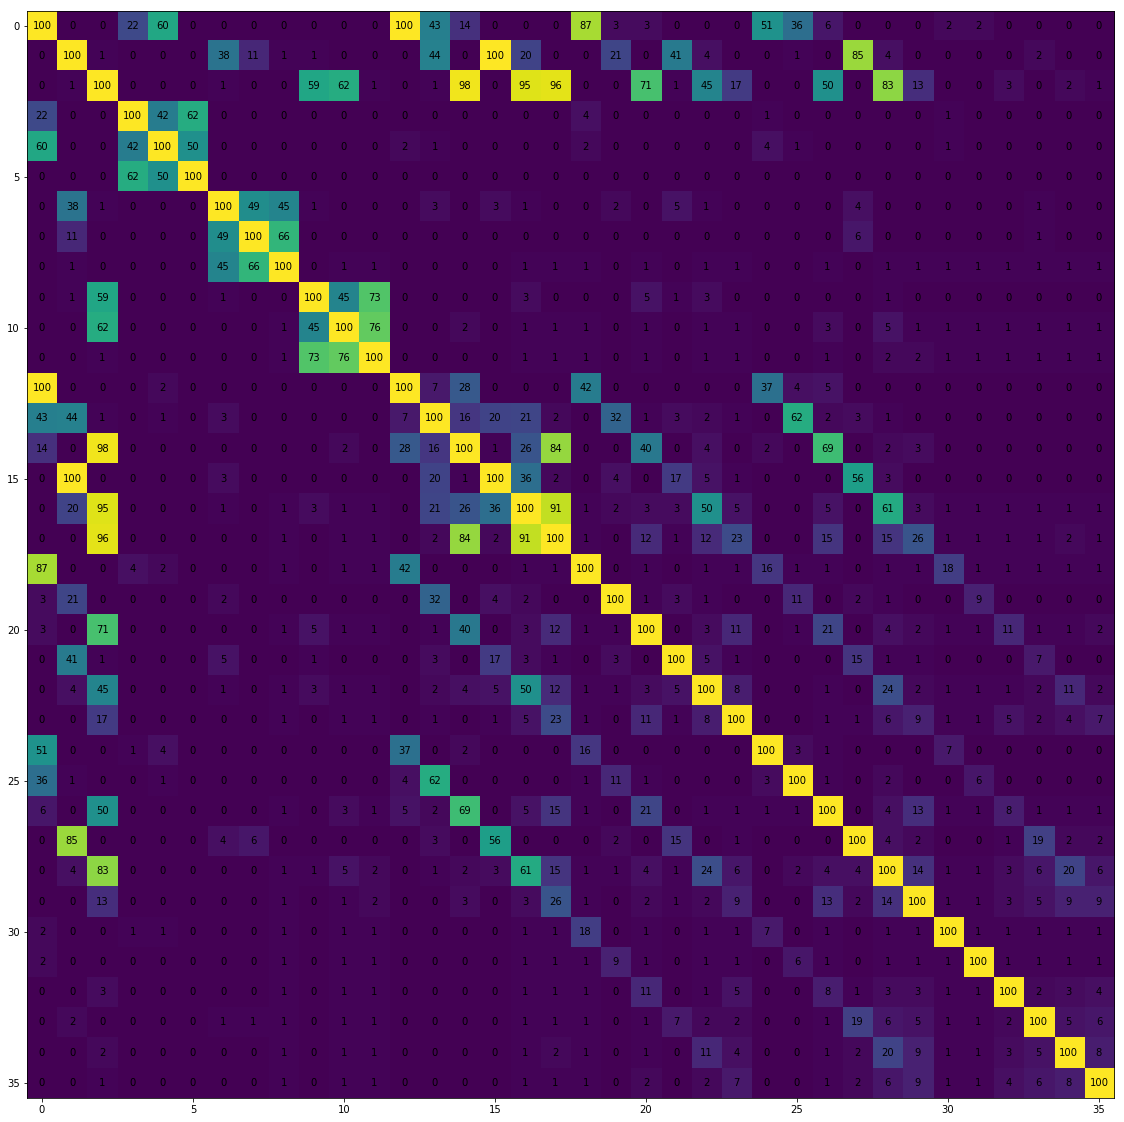

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd
import pickle
import os


# =====================================
class_comb_pref='indivudual_class_combinations_'

saved_maps= '../simulations/economic_2_multiple_new.corrmaps'
savedir='../results/economic_all_new'
tosaveImgs=True

do_print_percentiles=False
range_combs=range(2,3)
howManyCorrsS=0
howManyCorrsE=20
# ===================================



def draw_text(corr_map,corr_size):
    
    for i,j in itertools.product(range(corr_size),range(corr_size)):
#         if str(corr_map[i,j])!='0': print( str(corr_map[i,j]))
        plt.text(i, j, str(corr_map[i,j]), va='center', ha='center')
        
        
def get_topNcorrs(corr_map,howManyS,howManyE):
    min_diag=(corr_map-np.eye(corr_map.shape[0]))
    
    sorted_inds=np.argsort(
        -min_diag[np.triu_indices(corr_map.shape[0],k=1)])[howManyS:howManyE]
    
    
    all_locs=np.array([(i,j) for i,j in  itertools.combinations(range(corr_map.shape[0]),2)])
    just_top_mask=corr_map==np.max(corr_map)
    just_top=np.zeros(corr_map.shape,dtype=int)
    for i,j in itertools.combinations(range(corr_map.shape[0]),2):
        if just_top_mask[i,j] and i!=j:
            just_top[i,j]=corr_map[i,j]
   
    return just_top
    

with open(saved_maps,'rb') as f:
    corrmaps=pickle.load(f)



if not os.path.exists(savedir):
    os.makedirs(savedir)

plt.figure(figsize=(20,20))

# plt.imshow(corr_map, interpolation="nearest",cmap='viridis')
for class_i in range_combs:
    
    class_comb_mats=corrmaps[class_comb_pref+str(class_i)]
    len_combs=len(class_comb_mats)
    print(len_combs)
    for indcomb,comb_mat in enumerate(class_comb_mats):
        plt.clf()
        plt.imshow(comb_mat, interpolation="nearest",cmap='viridis')
        corr_id=class_comb_pref+str(indcomb)+'_from_{}_classes'.format(class_i)    
        
        if class_i==2: 
            draw_text(comb_mat,comb_mat.shape[0])
        if do_print_percentiles:
            top_img=get_topNcorrs(comb_mat,howManyCorrsS, howManyCorrsE)
            plt.clf()
            plt.imshow(top_img.copy(),cmap='viridis')
            draw_text(top_img,top_img.shape[0])
            print('np sum',np.sum(top_img))
            
            plt.savefig(os.path.join(savedir,corr_id)+'_just_top{}-{}.png'.format(howManyCorrsS, howManyCorrsE),dpi=200)
            
#             print('top {}-{} of {} are: \n'.format( howManyCorrsS,howManyCorrsE,corr_key),
              
#               '\n'.join(map(str,top_inds) ),
#              '\n================\n')
        
        if tosaveImgs: plt.savefig(os.path.join(savedir,corr_id)+'.png',dpi=200)
        
for c_ind,corr_map in enumerate(corrmaps['summary_by_class_comb_combination']):
    plt.clf()
    plt.imshow(corr_map, interpolation="nearest",cmap='viridis')
    
    corr_key='summary_by_class_comb_combination_'+str(c_ind+2)+'_classes'

    
    if corr_map.shape[0]==36: 
        draw_text(corr_map,corr_map.shape[0])
    if do_print_percentiles:
        top_img=get_topNcorrs(corr_map,howManyCorrsS, howManyCorrsE)
        plt.clf()
        plt.imshow(top_img, interpolation="nearest",cmap='viridis')
        draw_text(top_img,top_img.shape[0])
        plt.savefig(os.path.join(savedir,corr_key)+'_just_top{}-{}.png'\
                    .format(howManyCorrsS, howManyCorrsE),dpi=200)
        
#         print('top {}-{} of {} are: \n'.format( howManyCorrsS,howManyCorrsE,corr_key),
              
#               '\n'.join(map(str,top_inds) ),
#              '\n================\n')
        
    
    if tosaveImgs or 3: plt.savefig(os.path.join(savedir,
            corr_key)+'.png',dpi=200)

        
# for c_ind,corr_map in enumerate(corrmaps['final_summary']):
#     plt.clf()
#     plt.imshow(corr_map, interpolation="nearest",cmap='viridis')
#     if corr_map.shape[0]==36: 
#         draw_text(corr_map,corr_map.shape[0])
#     else:
#         get_topNcorrs(corr_map,howManyCorrs)
    
#     if tosaveImgs: plt.savefig(os.path.join(savedir,'final_summary_'+str(c_ind+2)+'_classes')+'.png',dpi=200)



In [15]:
import numpy as np
import itertools

a=np.arange(16).reshape((4,4))

def get_topNcorrs(corr_map,howMany):
    min_diag=(corr_map-np.eye(corr_map.shape[0]))
    
    sorted_inds=np.argsort(
        -min_diag[np.triu_indices(corr_map.shape[0],k=1)])[:howMany]
    
    all_locs=np.array([(i,j) for i,j in  itertools.combinations(range(corr_map.shape[0]),2)])
    return all_locs[sorted_inds]
    


print(-a[np.triu_indices(4,k=1)],np.argsort(-a[np.triu_indices(4,k=1)]))

a,list([(i,j) for i,j in  itertools.combinations(range(4),2)] ),a[1,3]

[ -1  -2  -3  -6  -7 -11] [5 4 3 2 1 0]


(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]),
 [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)],
 7)

In [30]:
"""DRAWING PERCENTILE COUNTMAPS"""


import pickle
        


saved_maps= '../simulations/economic_full_nobigones.countmaps'

with open(saved_maps,'rb') as f:
    countmaps=pickle.load(f)

    
    
print(countmaps.keys())


dict_keys(['indivudual_class_combinations_4', 'indivudual_class_combinations_2_config', 'indivudual_class_combinations_4_config', 'final_summary', 'indivudual_class_combinations_3_config', 'indivudual_class_combinations_2', 'indivudual_class_combinations_3'])


these many ks:  dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
[ -2.5   0.    2.5   5.    7.5  10.   12.5  15.   17.5  20. ] 21 20


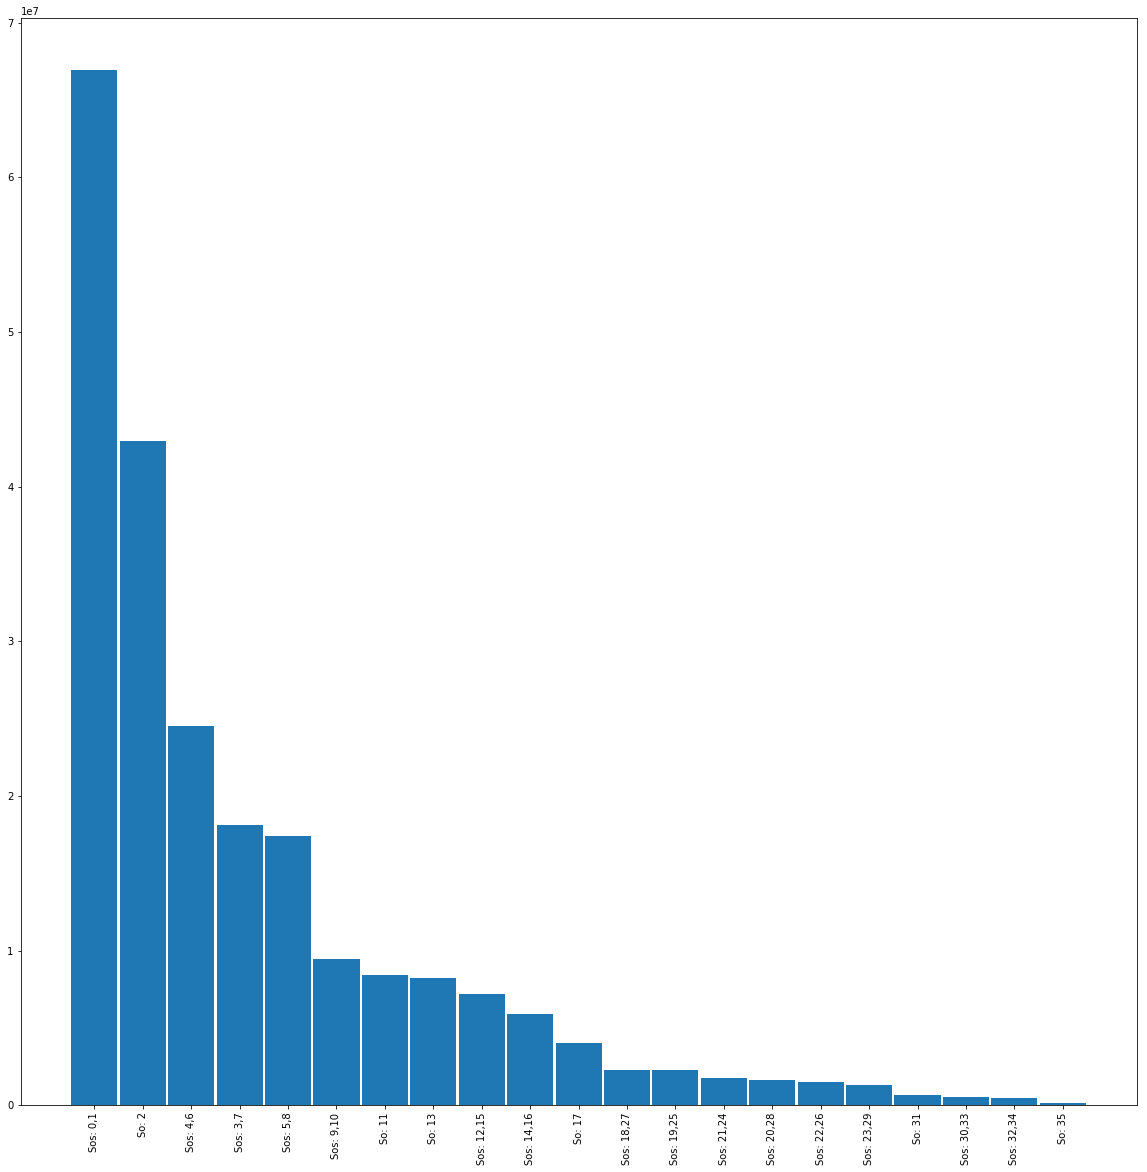

In [5]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd
import pickle
import os
import math
import sys

sys.path.append('..')
from multiplex_pygraph.Multiplex_Graph import GraphFunc

map_same='''0,1
2
3,7
4,6
5,8
9,10
11
12,15
13
14,16
17
18,27
19,25
20,28
21,24
22,26
23,29
30,33
31
32,34
35'''.splitlines()

def return_averaged_same(unw):
    new_unwrapped=[]
    for row in map_same:
        if ',' in row:
            a,b=list(map(int,row.split(',')))
            new_unwrapped.append((
            'Sos: {},{}'.format(a,b), (unw[a][1]+unw[b][1])/2.0 ))
        else:
            a=int(row)
            new_unwrapped.append(( 'So: {}'.format(a,) ,unw[a][1]))
    return new_unwrapped

def get_unwrapped_edgetypes_by_ind(edge_types,get_ind):

    n=len(edge_types)
    Cn=(2**(n))-1
    all_edgetypes=[]

    for c_n in range(1,n+1):
        for combs in itertools.combinations(edge_types,c_n):
            all_edgetypes.append(';'.join(combs))



    graphF=GraphFunc(doDirected=False)
    graphF.edgeN=Cn

    doSummaryInd=True

    sumInd=0
    for i,e in enumerate(all_edgetypes):
        if i==get_ind:
            return (0,(e,))

    sumInd+=i+1
    for ind,(a,b) in enumerate(itertools.product(range(Cn),range(Cn))):
        real_ind=(a*Cn)+b  + (sumInd if doSummaryInd else 0) 
        if real_ind==get_ind:
            return 1,(all_edgetypes[a],all_edgetypes[b])

    sumInd+=ind+1
    for ind,(a,b) in enumerate(itertools.combinations_with_replacement(range(Cn),2)):
        real_ind=graphF.calc_combR2(a,b)  + (sumInd if doSummaryInd else 0) 
        if real_ind==get_ind:
            return 2,(all_edgetypes[a],all_edgetypes[b])


    sumInd+=ind+1
    for c,(a,b) in itertools.product(range(Cn),\
                    itertools.combinations_with_replacement(range(Cn),2)):
        real_ind=graphF.calc_combR2(a,b) +(c*graphF.comb2_num()) + (sumInd if doSummaryInd else 0)  
        if real_ind==get_ind:
            return 3,(all_edgetypes[a],all_edgetypes[b],
                      all_edgetypes[c])


orb_dikt={0:'neighbour',1:'wedge_path',2:'wedge_star',3:'triangle'}
        
# for i in range(36):
#     print(get_unwrapped_edgetypes_by_ind('1;2'.split(';'),i  ))
        
# =====================================
class_comb_pref='indivudual_class_combinations_'

saved_maps= '../simulations/reses/economic_100bigcombs.countmaps'
savedir='../results/economic'
tosaveImgs=False

howManyTopOrbsP=50
howManyTopOrbsC=20
edge_types=['economic_1','economic_2']

# ===================================


with open(saved_maps,'rb') as f:
    countmaps=pickle.load(f)


final_summary_orbDikt,final_summary_count=countmaps['final_summary'][0]
print('these many ks: ',final_summary_orbDikt.keys())

unwrapped_orbs=[(k,final_summary_orbDikt[k]) for k in final_summary_orbDikt]

unwrapped_orbs.sort(key=lambda x: -x[1])

unwrapped_orbsn=np.array(unwrapped_orbs)


unwrapped_orbs=return_averaged_same(unwrapped_orbs)
unwrapped_orbs.sort(key=lambda x: -x[1])

lenu=len(unwrapped_orbs)


plt.figure(figsize=(20,20))
plt.bar(np.linspace(0,0.8*lenu,lenu),[unw[1] for unw in unwrapped_orbs ],)

loc,labels=plt.xticks()
plt.xticks(np.linspace(0,0.8*lenu,lenu),
           [unw[0] for unw in unwrapped_orbs ],rotation=90)
# howManyTopOrbsC=int(math.ceil((howManyTopOrbsP/100.0)*len(unwrapped_orbs)  ))
# plt.savefig('econ_histogram.pdf')
print (loc,len(unwrapped_orbs),howManyTopOrbsC)

# for orb_num,orb_count in unwrapped_orbs[:howManyTopOrbsC]:
#     bigorb,edge_conf=get_unwrapped_edgetypes_by_ind(edge_types,orb_num )
#     print ('\n=====\n')
#     print(('The suborbit with index: {},(part of orbit: {})\n edge_configuration: ({})\n, is touched by a node: '+
#           '{} times, from {} possible graph combinations')\
#           .format(orb_num,orb_dikt[bigorb],edge_conf,orb_count,final_summary_count))







[339388 457436]
(2160, 2160) 38980
(2160, 2160)


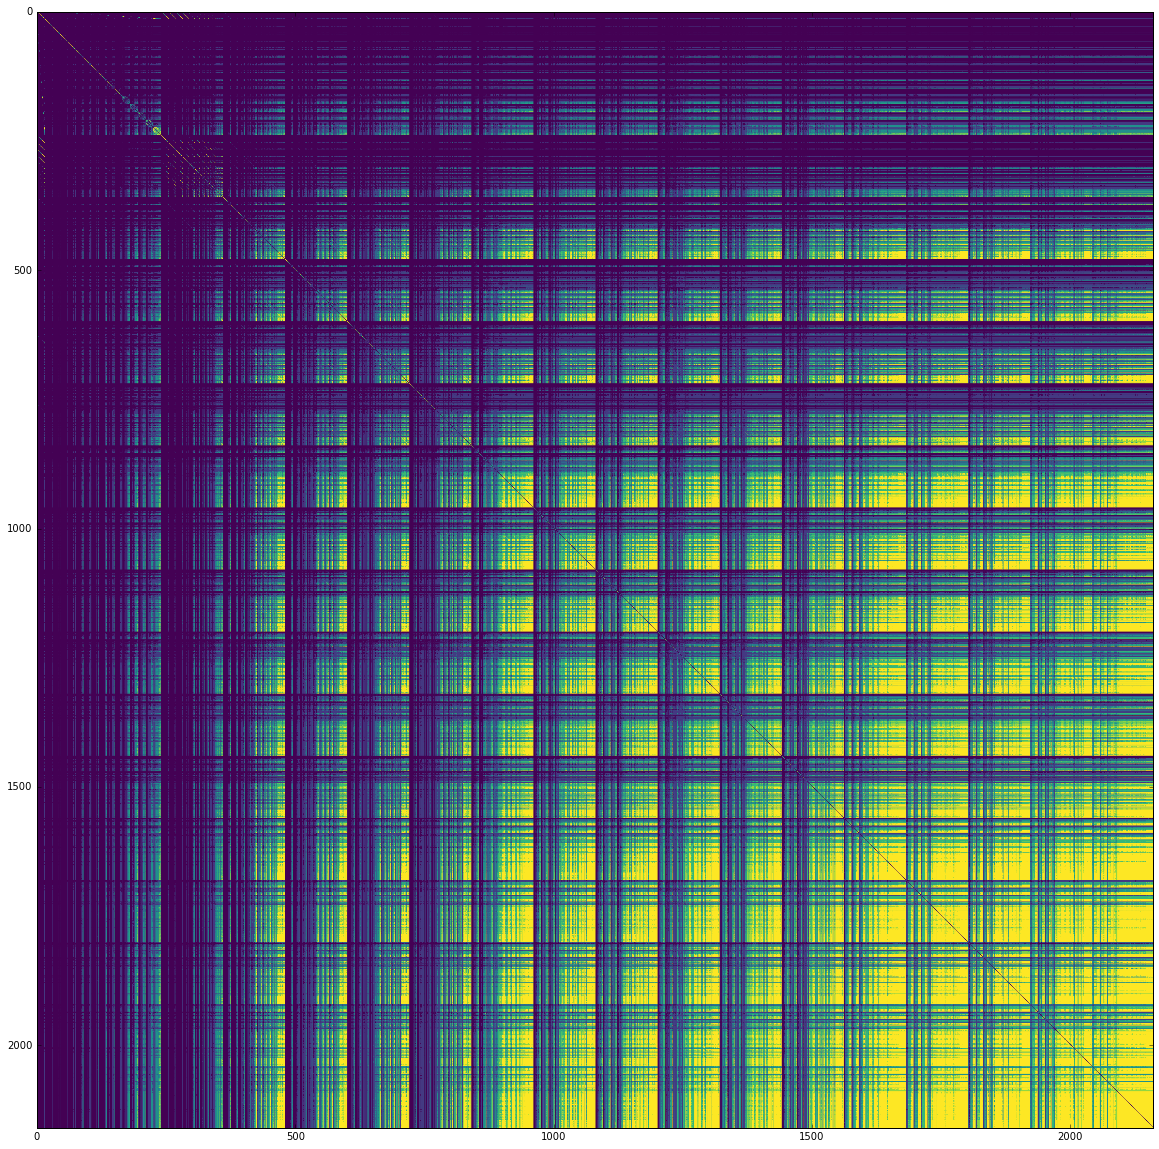

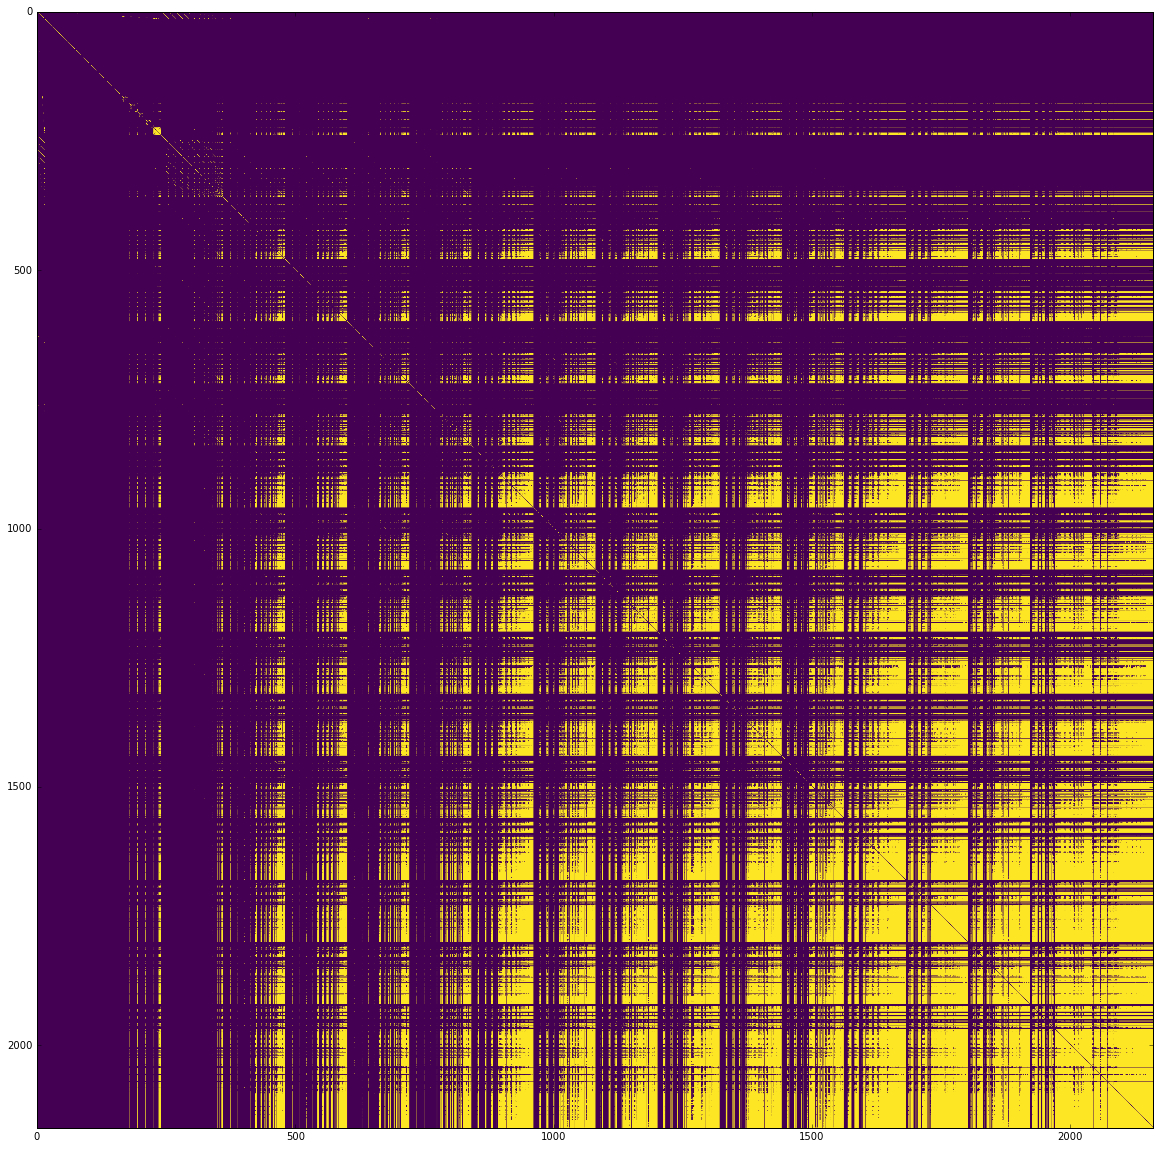

In [33]:
#### '''Connecting paralelized corrmaps'''

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd
import pickle





sumn=np.zeros((2,),dtype=int)
sumcorr=[np.zeros(
    (2160,2160 ),dtype=int),np.zeros(
    (2160,2160 ),dtype=int)]

for ind in range(8):
    saved_maps= 'combs/just_bigones_8bcount_{}bind.corrmaps'.format(ind)

    with open(saved_maps,'rb') as f:
        corrmaps=pickle.load(f)



    for indconf,(confi,confj,num) in \
    enumerate(corrmaps['indivudual_class_combinations_4_config']):
        sumn[indconf]+=num
    
    for indconf,(corr) in \
    enumerate(corrmaps['indivudual_class_combinations_4']):
        sumcorr[indconf]+=corr
    
print(sumn)



deep_sumary_cors_4=[]

for indconf in range(2):
    deep_sumary_cors_4.append(
    ((sumcorr[indconf]/sumn[indconf])>0.6).astype(int)   )

    
saved_other_maps= 'combs/economic_2,3,4_justsmall.corrmaps'

with open(saved_other_maps,'rb') as f:
    corrmaps=pickle.load(f)
    
print(corrmaps['indivudual_class_combinations_4'][0].shape,
      corrmaps['unsummarized_maps'][-1][1] )
    

unsum_m,unsum_c=corrmaps['unsummarized_maps'][-1]

    
for indconf in range(2):
    corrmaps['indivudual_class_combinations_4']\
        .append(sumcorr[indconf])
    
    corrmaps['summary_by_class_comb_combination'][-1]+=deep_sumary_cors_4[indconf]
    unsum_m+=sumcorr[indconf]
    unsum_c+=sumn[indconf]
    

shallow_summary_cors_4=((unsum_m/unsum_c)>0.6).astype(int)
    
    
corrmaps['final_summary'][-1]=shallow_summary_cors_4



saved_full_economic_maps= '../simulations/economic_2,3,4_full.corrmaps'

with open(saved_full_economic_maps,'wb') as f:
    pickle.dump(corrmaps,f)
    

    
plt.figure(figsize=(20,20))
plt.imshow(corrmaps['summary_by_class_comb_combination'][-1],
           cmap='viridis')

plt.figure(figsize=(20,20))
plt.imshow(shallow_summary_cors_4,
           cmap='viridis')
    
print(corrmaps['indivudual_class_combinations_4'][0].shape)

In [21]:
4032+20748+312+13888

38980

In [25]:
a=np.random.rand(4,4)

mask=a>0.5

for i,j in itertools.product(range(a.shape[0]),range(a.shape[0])):
    if not mask[i,j]:
        a[i,j]=0
a

array([[ 0.72586793,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.73402906,  0.        ,  0.        ],
       [ 0.50287886,  0.58380698,  0.        ,  0.        ],
       [ 0.        ,  0.68376081,  0.59882761,  0.64575757]])